<a href="https://colab.research.google.com/github/abhipsitabose/LTC-Rota-Optimisation/blob/main/Evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# ==============================
# Dissertation Results & Evaluation
# ==============================

# --- STEP 1: Install dependencies ---
!pip install seaborn matplotlib scipy pandas

# --- STEP 2: Upload results file ---
from google.colab import files
import pandas as pd

uploaded = files.upload()
filename = list(uploaded.keys())[0]
df = pd.read_csv(filename)

print("File loaded successfully")
print(df.head())


Saving results_summary.csv to results_summary.csv
✅ File loaded successfully
   staff_size  absence_rate preference_level  agency_multiplier  mip_coverage  \
0          50          0.05              low                1.5     92.156863   
1          50          0.05              low                2.0     92.156863   
2          50          0.05           medium                1.5     92.156863   
3          50          0.05           medium                2.0     92.156863   
4          50          0.05             high                1.5     92.156863   

   mip_cost  mip_pref_hit_rate  mip_fairness_std  mip_overtime_hours  \
0    124520           2.416918         49.435937                   0   
1    124520           2.719033         49.383067                   0   
2    124520           2.416918         49.435937                   0   
3    124520           2.719033         49.383067                   0   
4    124520           2.416918         49.435937                   0   

   

In [ ]:
# --- STEP 3: Imports ---
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import ttest_rel, kruskal

sns.set(style="whitegrid", font_scale=1.2)


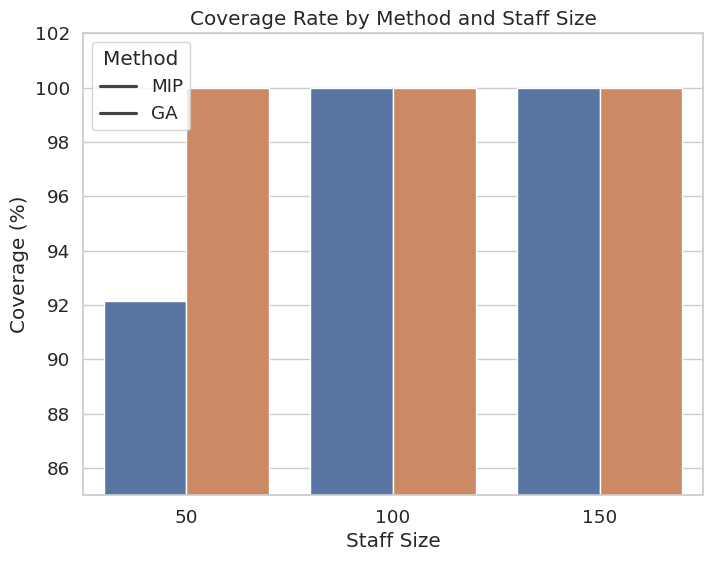

Coverage: t=-5.15, p=0.0000


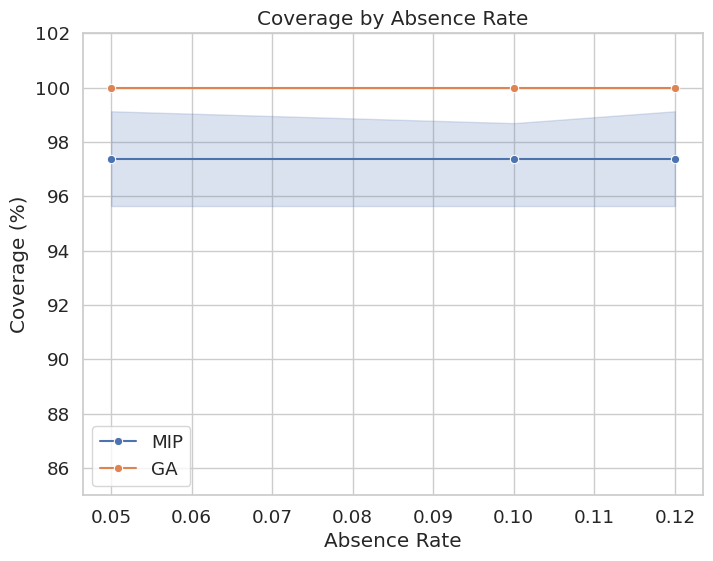

In [ ]:
# --- STEP 4: Evaluation ---
# --- #1. Coverage Comparison ---
df_cov = df.melt(id_vars=["staff_size","absence_rate"],
                 value_vars=["mip_coverage","ga_coverage"],
                 var_name="method", value_name="coverage")

plt.figure(figsize=(8,6))
sns.barplot(data=df_cov, x="staff_size", y="coverage", hue="method")
plt.title("Coverage Rate by Method and Staff Size")
plt.ylim(85, 102)
plt.ylabel("Coverage (%)")
plt.xlabel("Staff Size")
plt.legend(title="Method", labels=["MIP", "GA"])
plt.show()

# Coverage t-test
t_cov, p_cov = ttest_rel(df["mip_coverage"], df["ga_coverage"])
print(f"Coverage: t={t_cov:.2f}, p={p_cov:.4f}")

# 1.1. Coverage by Absence Rate (lineplot)
plt.figure(figsize=(8,6))
sns.lineplot(data=df, x="absence_rate", y="mip_coverage", marker="o", label="MIP")
sns.lineplot(data=df, x="absence_rate", y="ga_coverage", marker="o", label="GA")
plt.title("Coverage by Absence Rate")
plt.ylabel("Coverage (%)")
plt.xlabel("Absence Rate")
plt.ylim(85, 102)
plt.legend()
plt.show()

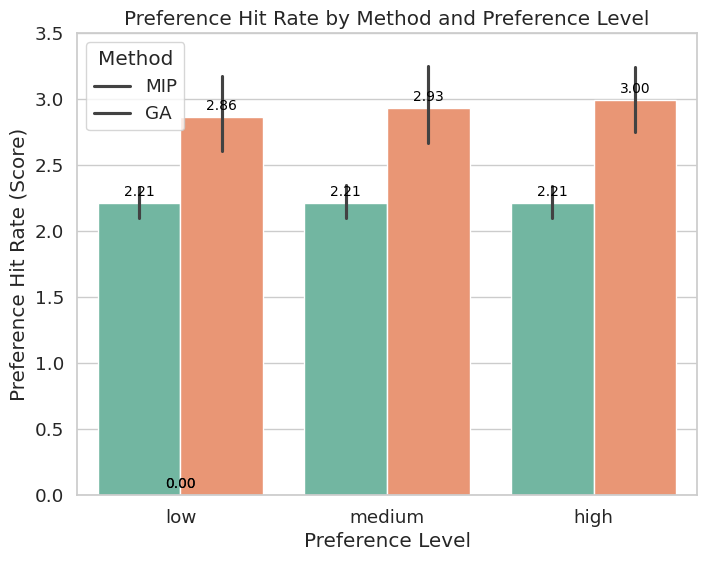

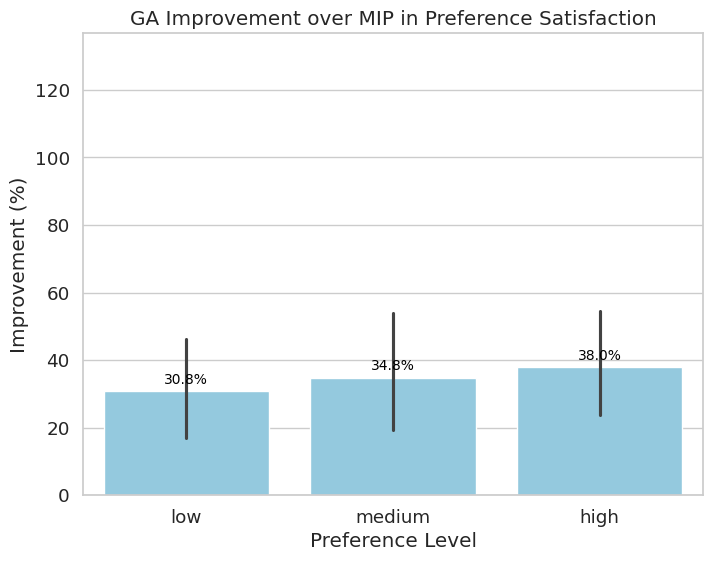

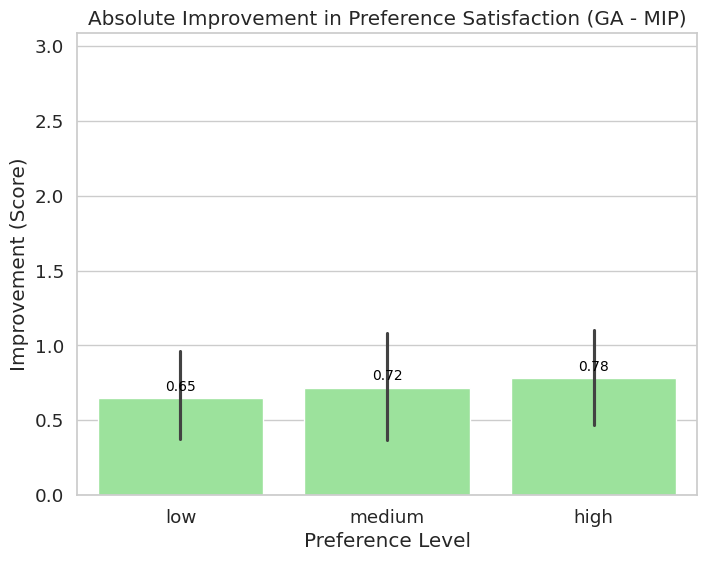

Paired t-test (MIP vs GA preference satisfaction): t=-7.53, p=0.0000
Kruskal-Wallis across preference levels: H=0.24, p=0.8854


In [ ]:
# --- 2. Preference Satisfaction ---
# 1. Grouped barplot with annotations
plt.figure(figsize=(8,6))
ax = sns.barplot(data=df_pref, x="preference_level", y="pref_hit_rate", hue="method", palette="Set2")
plt.title("Preference Hit Rate by Method and Preference Level")
plt.ylabel("Preference Hit Rate (Score)")
plt.xlabel("Preference Level")
plt.ylim(0, 3.5)

# Annotate bars with actual values
for p in ax.patches:
    ax.annotate(f"{p.get_height():.2f}",
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=10, color="black", xytext=(0,3), textcoords="offset points")

plt.legend(title="Method", labels=["MIP", "GA"])
plt.show()


# 2. Improvement percentage plot with annotations
plt.figure(figsize=(8,6))
ax = sns.barplot(data=df, x="preference_level", y="pref_improvement_pct", color="skyblue")
plt.title("GA Improvement over MIP in Preference Satisfaction")
plt.ylabel("Improvement (%)")
plt.xlabel("Preference Level")
plt.ylim(0, df["pref_improvement_pct"].max()+10)

# Annotate bars with percentages
for p in ax.patches:
    ax.annotate(f"{p.get_height():.1f}%",
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=10, color="black", xytext=(0,3), textcoords="offset points")

plt.show()


# 3. Difference plot (GA - MIP absolute improvement)
df["pref_diff"] = df["ga_pref_hit_rate"] - df["mip_pref_hit_rate"]
plt.figure(figsize=(8,6))
ax = sns.barplot(data=df, x="preference_level", y="pref_diff", color="lightgreen")
plt.title("Absolute Improvement in Preference Satisfaction (GA - MIP)")
plt.ylabel("Improvement (Score)")
plt.xlabel("Preference Level")
plt.ylim(0, df["pref_diff"].max()+0.5)

# Annotate with differences
for p in ax.patches:
    ax.annotate(f"{p.get_height():.2f}",
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=10, color="black", xytext=(0,3), textcoords="offset points")

plt.show()


from scipy.stats import ttest_rel, kruskal

# --- Paired t-test (MIP vs GA preference satisfaction) ---
t_pref, p_pref = ttest_rel(df["mip_pref_hit_rate"], df["ga_pref_hit_rate"])
print(f"Paired t-test (MIP vs GA preference satisfaction): t={t_pref:.2f}, p={p_pref:.4f}")

# --- Kruskal-Wallis test across preference levels (improvement robustness) ---
groups = [df[df["preference_level"]==lvl]["pref_improvement_pct"] for lvl in df["preference_level"].unique()]
kw_stat, kw_p = kruskal(*groups)
print(f"Kruskal-Wallis across preference levels: H={kw_stat:.2f}, p={kw_p:.4f}")



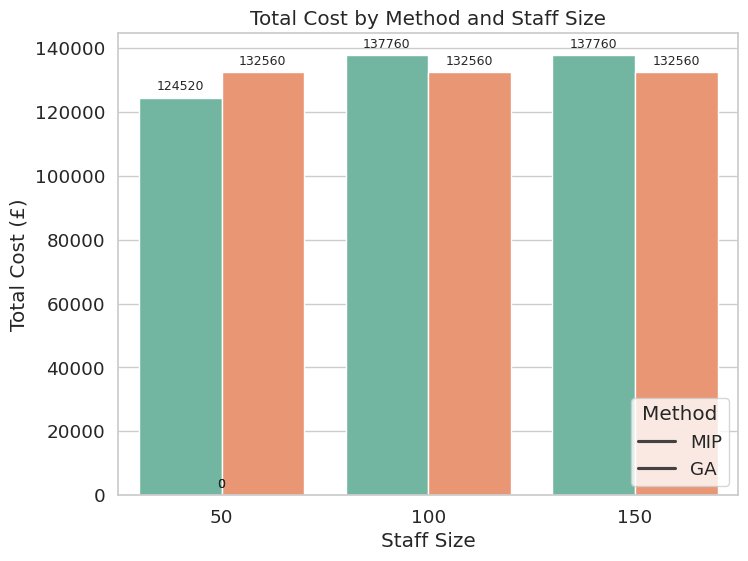

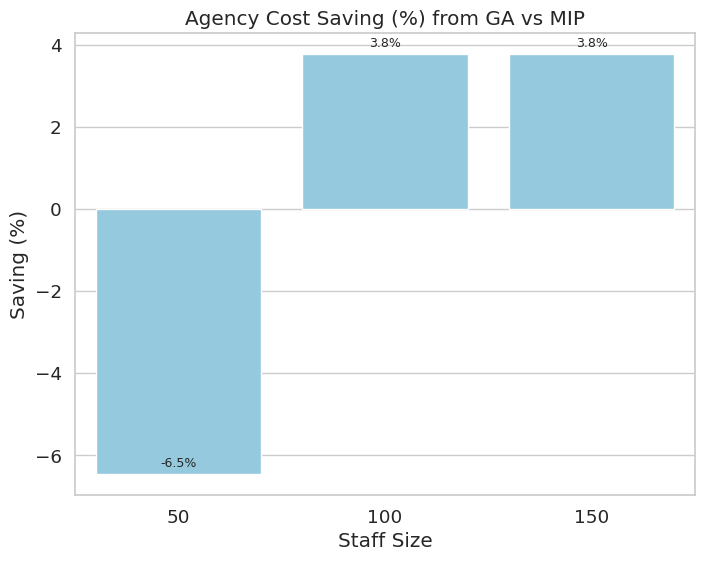

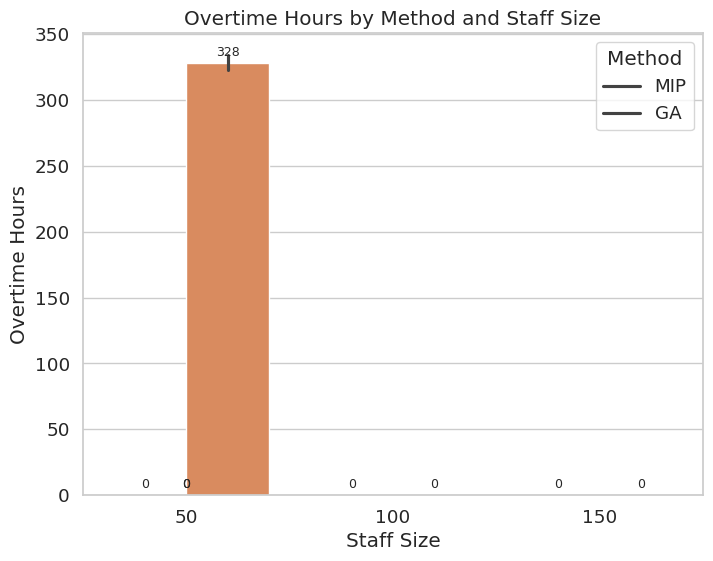

Total Cost: t=0.92, p=0.3630
Overtime Hours: t=-5.14, p=0.0000


In [ ]:
# --- 3. Cost Comparison ---
from scipy.stats import ttest_rel

# --- 1. Grouped barplot: Total Cost (MIP vs GA) ---
df_cost = df.melt(id_vars=["staff_size","absence_rate"],
                  value_vars=["mip_cost","ga_cost"],
                  var_name="method", value_name="total_cost")

plt.figure(figsize=(8,6))
ax = sns.barplot(data=df_cost, x="staff_size", y="total_cost", hue="method", palette="Set2")
plt.title("Total Cost by Method and Staff Size")
plt.ylabel("Total Cost (£)")
plt.xlabel("Staff Size")

# Annotate
for p in ax.patches:
    ax.annotate(f"{p.get_height():.0f}",
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=9, xytext=(0,3), textcoords="offset points")

plt.legend(title="Method", labels=["MIP","GA"])
plt.show()


# --- 2. Agency Cost Saving % (already in dataset) ---
plt.figure(figsize=(8,6))
ax = sns.barplot(data=df, x="staff_size", y="agency_cost_saving_pct", color="skyblue")
plt.title("Agency Cost Saving (%) from GA vs MIP")
plt.ylabel("Saving (%)")
plt.xlabel("Staff Size")

for p in ax.patches:
    ax.annotate(f"{p.get_height():.1f}%",
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=9, xytext=(0,3), textcoords="offset points")

plt.show()


# --- 3. Grouped barplot: Overtime Hours (MIP vs GA) ---
df_ot = df.melt(id_vars=["staff_size","absence_rate"],
                value_vars=["mip_overtime_hours","ga_overtime_hours"],
                var_name="method", value_name="overtime_hours")

plt.figure(figsize=(8,6))
ax = sns.barplot(data=df_ot, x="staff_size", y="overtime_hours", hue="method", palette="muted")
plt.title("Overtime Hours by Method and Staff Size")
plt.ylabel("Overtime Hours")
plt.xlabel("Staff Size")

for p in ax.patches:
    ax.annotate(f"{p.get_height():.0f}",
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=9, xytext=(0,3), textcoords="offset points")

plt.legend(title="Method", labels=["MIP","GA"])
plt.show()


# --- 4. Statistical Tests ---
t_cost, p_cost = ttest_rel(df["mip_cost"], df["ga_cost"])
t_ot, p_ot = ttest_rel(df["mip_overtime_hours"], df["ga_overtime_hours"])

print(f"Total Cost: t={t_cost:.2f}, p={p_cost:.4f}")
print(f"Overtime Hours: t={t_ot:.2f}, p={p_ot:.4f}")



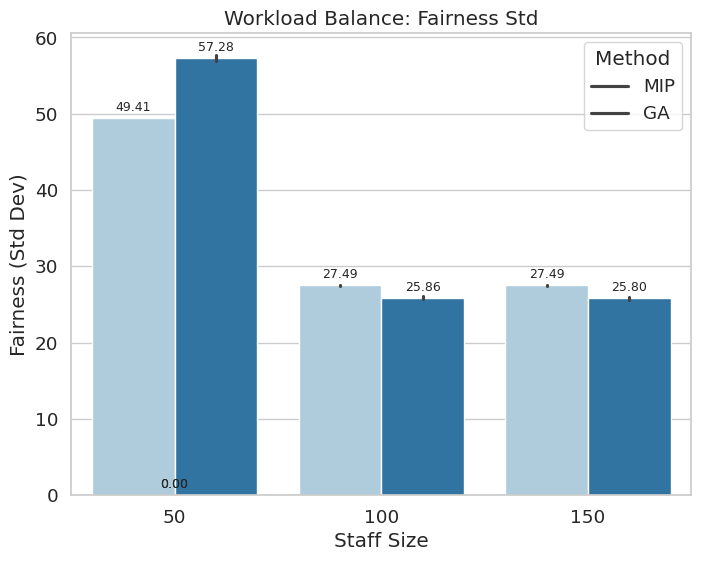

Fairness Comparison: t=-2.44, p=0.0182


In [ ]:
# --- 4. Fairness (Std Hours) ---
# --- 1. Fairness (Std Dev of workload balance) ---
df_fair = df.melt(id_vars=["staff_size","absence_rate"],
                  value_vars=["mip_fairness_std","ga_fairness_std"],
                  var_name="method", value_name="fairness_std")

plt.figure(figsize=(8,6))
ax = sns.barplot(data=df_fair, x="staff_size", y="fairness_std", hue="method", palette="Paired")
plt.title("Workload Balance: Fairness Std")
plt.ylabel("Fairness (Std Dev)")
plt.xlabel("Staff Size")

for p in ax.patches:
    ax.annotate(f"{p.get_height():.2f}",
                (p.get_x() + p.get_width()/2., p.get_height()),
                ha="center", va="bottom", fontsize=9, xytext=(0,3), textcoords="offset points")

plt.legend(title="Method", labels=["MIP","GA"])
plt.show()

# --- Paired t-test for fairness ---
from scipy.stats import ttest_rel
t_fair, p_fair = ttest_rel(df["mip_fairness_std"], df["ga_fairness_std"])
print(f"Fairness Comparison: t={t_fair:.2f}, p={p_fair:.4f}")

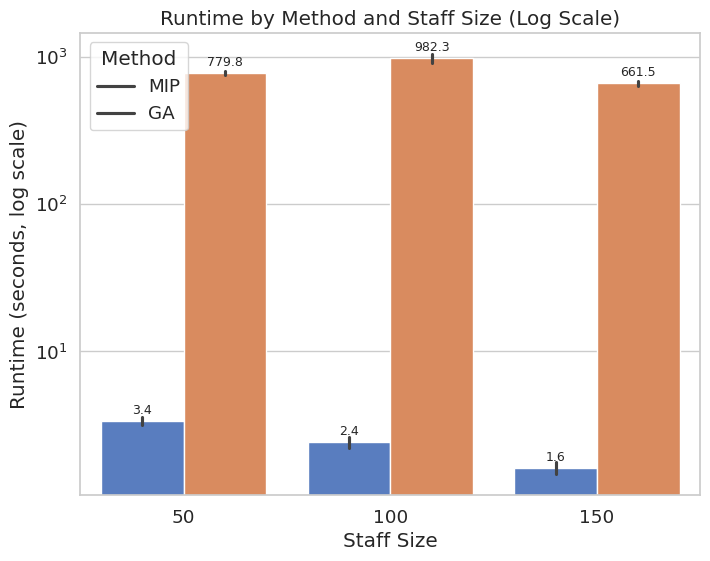

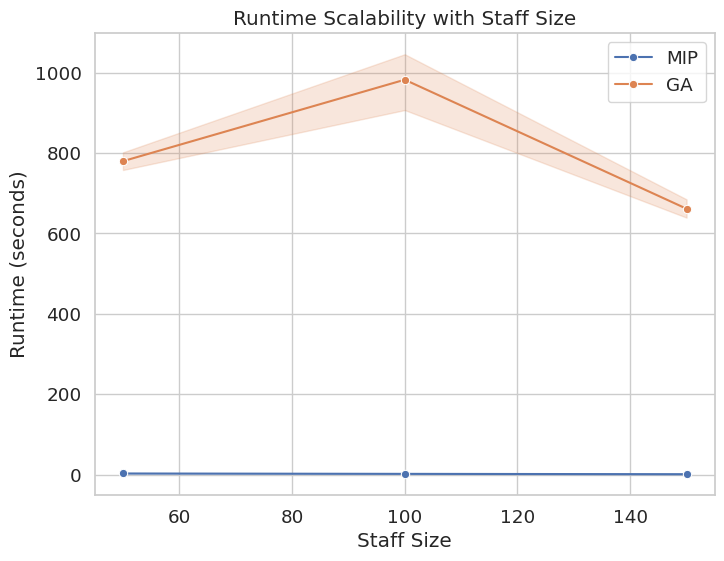

Runtime Comparison: t=-35.81, p=0.0000


In [ ]:
# --- 5. Runtime ---
# --- 1. Runtime Comparison (bar plot by staff size) ---
plt.figure(figsize=(8,6))
ax = sns.barplot(data=df_runtime, x="staff_size", y="runtime_sec", hue="method", palette="muted")
plt.title("Runtime by Method and Staff Size (Log Scale)")
plt.ylabel("Runtime (seconds, log scale)")
plt.xlabel("Staff Size")
plt.yscale("log")

for p in ax.patches:
    ax.annotate(f"{p.get_height():.1f}",
                (p.get_x() + p.get_width()/2., p.get_height()),
                ha="center", va="bottom", fontsize=9, xytext=(0,3), textcoords="offset points")

plt.legend(title="Method", labels=["MIP","GA"])
plt.show()

# --- 2. Runtime Scaling (line plot for scalability) ---
plt.figure(figsize=(8,6))
sns.lineplot(data=df, x="staff_size", y="mip_runtime_sec", marker="o", label="MIP")
sns.lineplot(data=df, x="staff_size", y="ga_runtime_sec", marker="o", label="GA")
plt.title("Runtime Scalability with Staff Size")
plt.ylabel("Runtime (seconds)")
plt.xlabel("Staff Size")
plt.legend()
plt.show()


# --- 3. Paired t-test for runtime ---
from scipy.stats import ttest_rel
t_run, p_run = ttest_rel(df["mip_runtime_sec"], df["ga_runtime_sec"])
print(f"Runtime Comparison: t={t_run:.2f}, p={p_run:.4f}")
